In [5]:
%load_ext autoreload
%autoreload 2


import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'
import logging
logging.getLogger().setLevel(logging.DEBUG)

In [6]:
from torchsummary import summary
import torch
use_cuda=torch.cuda.is_available()
import pytorch
from pytorch import dataset as ptd

import os
import datasets
import torch.optim as optim

dataset_name="mnist"

(x_train, y_train), (x_test, y_test), input_shape,num_classes = datasets.get_data(dataset_name)
dataset=ptd.ClassificationDataset(dataset_name,x_train,x_test,y_train,y_test,num_classes,input_shape)

print('x_train shape:', x_train.shape,x_train.dtype)
print('x_test shape:', x_test.shape,x_test.dtype)
print('y_train shape:', y_train.shape,y_train.dtype)
print('y_test shape:', y_test.shape,y_test.dtype)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


import numpy as np
print(np.unique(y_train.argmax(axis=1)))
print(y_train.min(),y_train.max())


Using TensorFlow backend.
/home/facundo/.python/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


x_train shape: (60000, 28, 28, 1) uint8
x_test shape: (10000, 28, 28, 1) uint8
y_train shape: (60000, 10) float64
y_test shape: (10000, 10) float64
60000 train samples
10000 test samples
[0 1 2 3 4 5 6 7 8 9]
0.0 1.0


In [13]:
from pytorch.experiment import models

model_name="SimpleConv"
model, optimizer, rotated_model, rotated_optimizer = models.get_model(model_name,dataset,use_cuda)

print(model)
print(rotated_model)

SimpleConv(
  (conv): SequentialWithIntermediates(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
  )
  (fc): SequentialWithIntermediates(
    (0): Linear(in_features=6272, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=10, bias=True)
  )
)
SimpleConv(
  (conv): SequentialWithIntermediates(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(

Training model with unrotated dataset...


Epoch 1: 100% (batch 938/938)  ==stats==> loss:  0.142, accuracy:  0.956, Time:  0:00:07


Test => Loss: 0.0476, Accuracy: 98.50% (9850/10000)


Epoch 2: 100% (batch 938/938)  ==stats==> loss: 0.0401, accuracy:  0.988, Time:  0:00:07


Test => Loss: 0.0259, Accuracy: 99.20% (9920/10000)


Epoch 3: 100% (batch 938/938)  ==stats==> loss: 0.0279, accuracy:  0.992, Time:  0:00:07


Test => Loss: 0.0365, Accuracy: 98.94% (9894/10000)


Epoch 4: 100% (batch 938/938)  ==stats==> loss: 0.0227, accuracy:  0.993, Time:  0:00:07


Test => Loss: 0.0224, Accuracy: 99.33% (9933/10000)


Epoch 5: 100% (batch 938/938)  ==stats==> loss: 0.0168, accuracy:  0.995, Time:  0:00:07


Test => Loss: 0.0239, Accuracy: 99.42% (9942/10000)


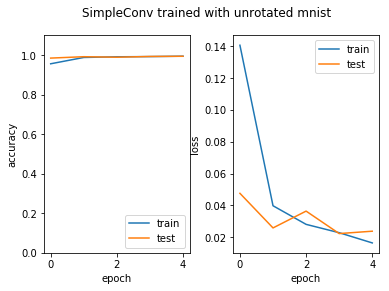

Skipping pretraining rotated model with unrotated dataset
Training rotated model with rotated dataset...


Epoch 1: 100% (batch 938/938)  ==stats==> loss:  0.463, accuracy:  0.847, Time:  0:00:07


Test => Loss: 0.1985, Accuracy: 93.49% (9349/10000)


Epoch 2: 100% (batch 938/938)  ==stats==> loss:  0.179, accuracy:  0.944, Time:  0:00:07


Test => Loss: 0.1372, Accuracy: 95.62% (9562/10000)


Epoch 3: 100% (batch 938/938)  ==stats==> loss:  0.139, accuracy:  0.957, Time:  0:00:07


Test => Loss: 0.1217, Accuracy: 96.33% (9633/10000)


Epoch 4: 100% (batch 938/938)  ==stats==> loss:  0.119, accuracy:  0.963, Time:  0:00:07


Test => Loss: 0.1223, Accuracy: 95.99% (9599/10000)


Epoch 5: 100% (batch 938/938)  ==stats==> loss:  0.106, accuracy:  0.967, Time:  0:00:07


Test => Loss: 0.0980, Accuracy: 96.80% (9680/10000)


Epoch 6: 100% (batch 938/938)  ==stats==> loss: 0.0988, accuracy:   0.97, Time:  0:00:07


Test => Loss: 0.0913, Accuracy: 97.13% (9713/10000)


Epoch 7: 100% (batch 938/938)  ==stats==> loss: 0.0912, accuracy:  0.971, Time:  0:00:07


Test => Loss: 0.0910, Accuracy: 96.96% (9696/10000)


Epoch 8: 100% (batch 938/938)  ==stats==> loss: 0.0858, accuracy:  0.973, Time:  0:00:07


Test => Loss: 0.0896, Accuracy: 97.25% (9725/10000)


Epoch 9: 100% (batch 938/938)  ==stats==> loss: 0.0801, accuracy:  0.975, Time:  0:00:07


Test => Loss: 0.0848, Accuracy: 97.27% (9727/10000)


Epoch 10: 100% (batch 938/938)  ==stats==> loss:  0.077, accuracy:  0.976, Time:  0:00:07


Test => Loss: 0.0808, Accuracy: 97.58% (9758/10000)


Epoch 11: 100% (batch 938/938)  ==stats==> loss: 0.0741, accuracy:  0.978, Time:  0:00:07


Test => Loss: 0.0777, Accuracy: 97.59% (9759/10000)


Epoch 12: 100% (batch 938/938)  ==stats==> loss: 0.0706, accuracy:  0.978, Time:  0:00:07


Test => Loss: 0.0732, Accuracy: 97.74% (9774/10000)


Epoch 13: 100% (batch 938/938)  ==stats==> loss: 0.0659, accuracy:  0.979, Time:  0:00:07


Test => Loss: 0.0700, Accuracy: 97.86% (9786/10000)


Epoch 14: 100% (batch 938/938)  ==stats==> loss: 0.0645, accuracy:   0.98, Time:  0:00:07


Test => Loss: 0.0779, Accuracy: 97.59% (9759/10000)


Epoch 15: 100% (batch 938/938)  ==stats==> loss: 0.0649, accuracy:   0.98, Time:  0:00:07


Test => Loss: 0.0757, Accuracy: 97.71% (9771/10000)


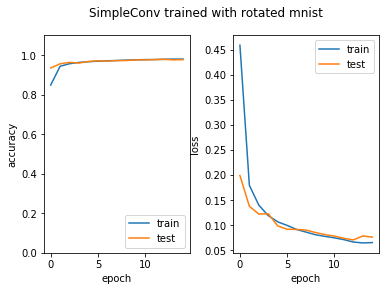

Testing both models on both datasets...


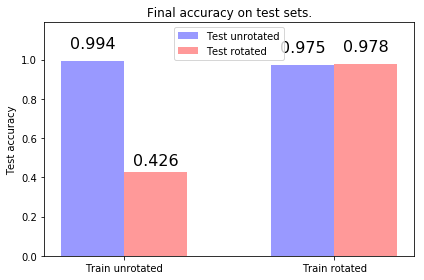

model_rotated_test_dataset score: loss=5.968804, accuracy=0.426000
model_rotated_train_dataset score: loss=5.930556, accuracy=0.426433
model_test_dataset score: loss=0.023879, accuracy=0.994200
model_train_dataset score: loss=0.008612, accuracy=0.997283
rotated_model_rotated_test_dataset score: loss=0.070417, accuracy=0.977500
rotated_model_rotated_train_dataset score: loss=0.063559, accuracy=0.980333
rotated_model_test_dataset score: loss=0.084819, accuracy=0.974800
rotated_model_train_dataset score: loss=0.078820, accuracy=0.976467


In [14]:
batch_size = 64

def get_epochs(dataset,model):
    if model=="SimpleConv":        
        epochs={'cifar10':70,'mnist':5,'fashion_mnist':12,'cluttered_mnist':10,'lsa16':50,'mnist_rot':5,'pugeault':15}
        rotated_epochs={'cifar10':120,'mnist':15,'fashion_mnist':60,'cluttered_mnist':30,'lsa16':100,'mnist_rot':5,'pugeault':40}
    elif model=="AllConv":
        epochs={'cifar10':5,'mnist':2,'fashion_mnist':12,'cluttered_mnist':10,'lsa16':50,'mnist_rot':5,'pugeault':15}
        rotated_epochs={'cifar10':100,'mnist':5,'fashion_mnist':60,'cluttered_mnist':30,'lsa16':100,'mnist_rot':5,'pugeault':40}
    else:
        raise ValueError(f"Invalid model name: {model}")
    return epochs[dataset],rotated_epochs[dataset]

epochs,rotated_epochs=get_epochs(dataset.name,model_name)

config=pytorch.experiment.rotation.TrainRotatedConfig(batch_size=batch_size,
                   epochs=epochs,rotated_epochs=rotated_epochs,
                   pre_rotated_epochs=0, optimizer=optimizer,rotated_optimizer=rotated_optimizer,
                  use_cuda=use_cuda)

scores=rotation.run(config,model,rotated_model,dataset,plot_accuracy=True,save_plots=False)
for k,v in scores.items():
    print('%s score: loss=%f, accuracy=%f' % (k,v[0],v[1]))


In [34]:
from pytorch.experiment import invariance
n_rotations=16
rotations=np.linspace(-180,180,n_rotations,endpoint=False)

# vmax_class={"lsa16":6,"mnist":5,"cifar10":10}
# vmax_all={"lsa16":3.5,"mnist":5,"cifar10":10}

rotated_invariance_measure,classes=invariance.run(rotated_model,dataset,config,rotations)
invariance_measure,classes=invariance.run(model,dataset,config,rotations)

vmin_class,vmax_class=invariance.outlier_range_both(rotated_invariance_measure,invariance_measure)
vmin_class=0





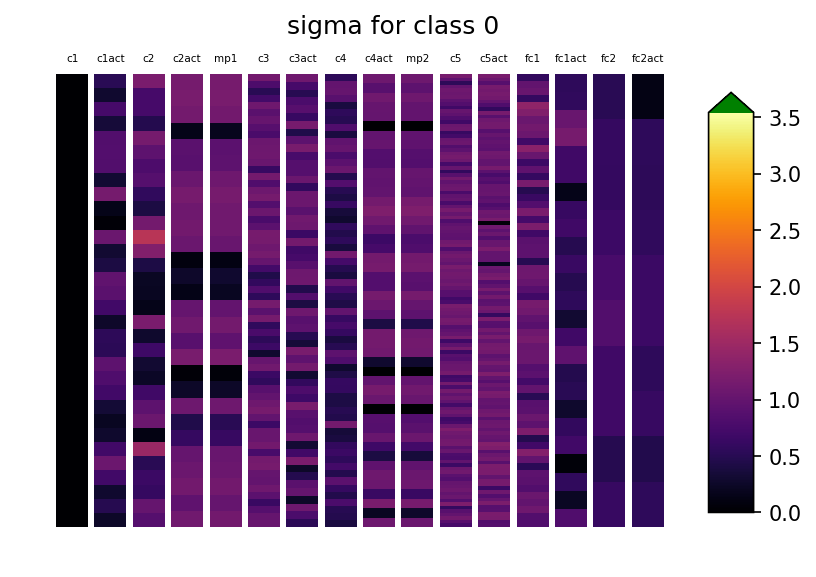

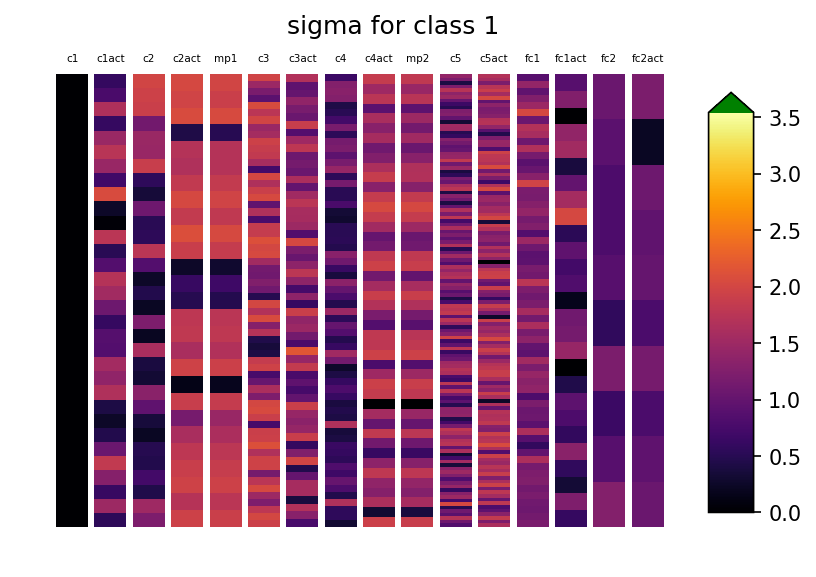

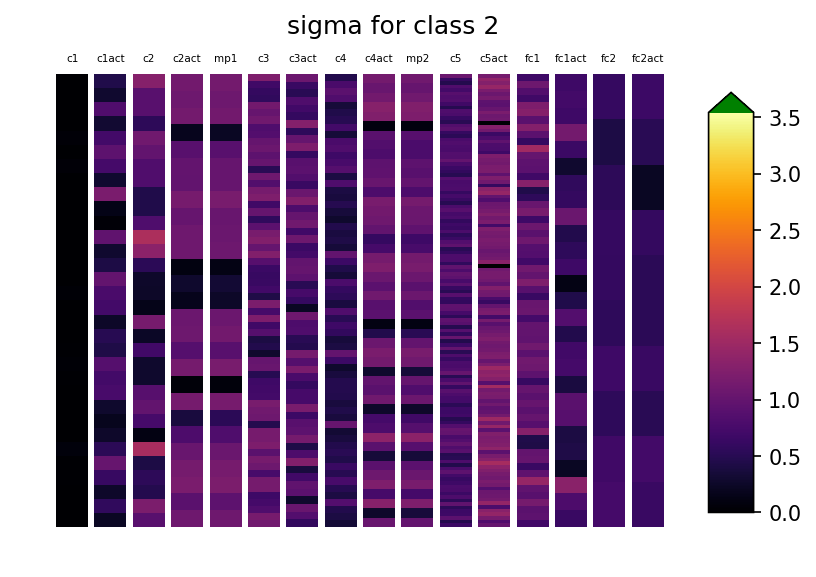

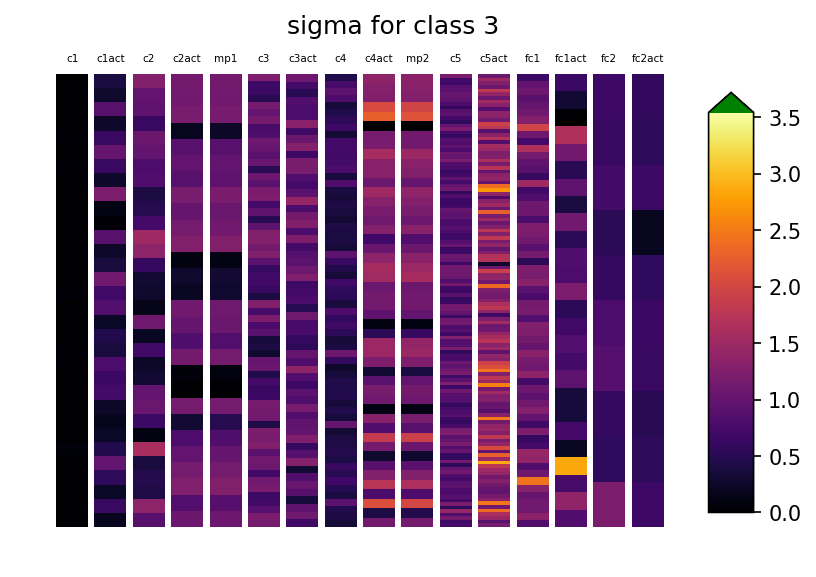

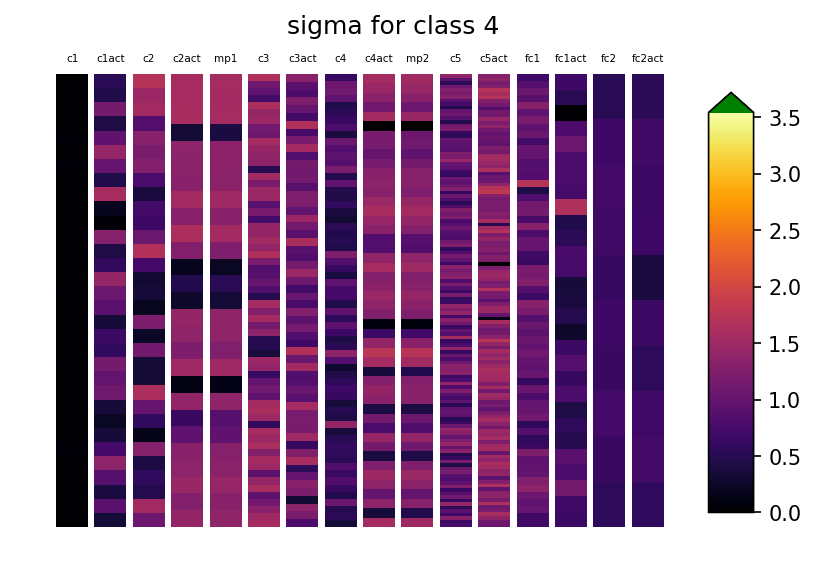

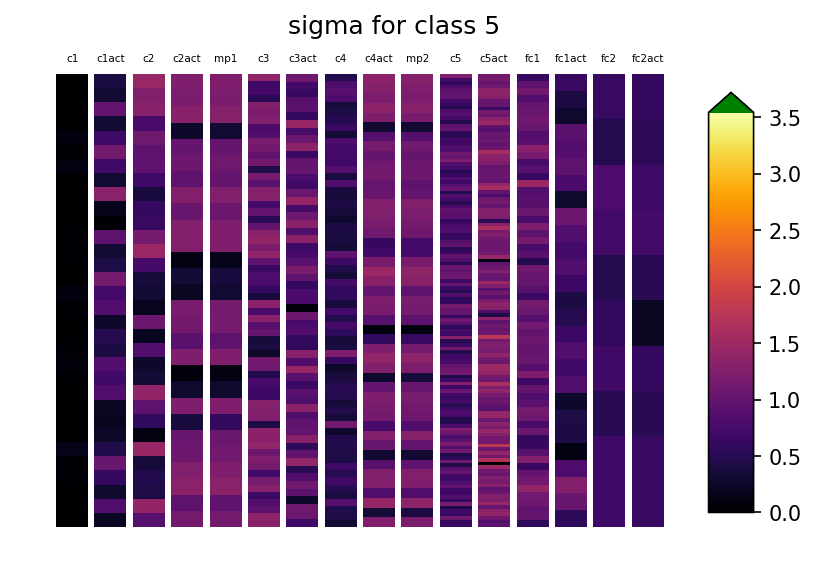

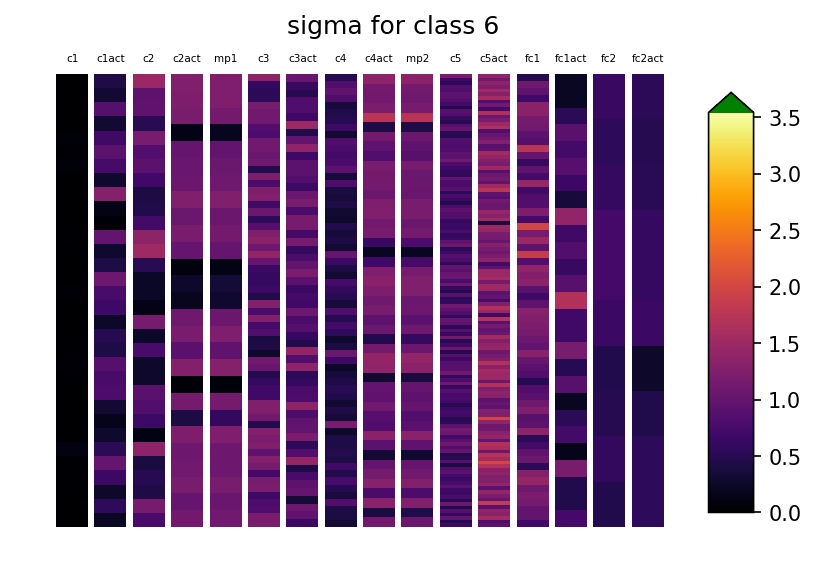

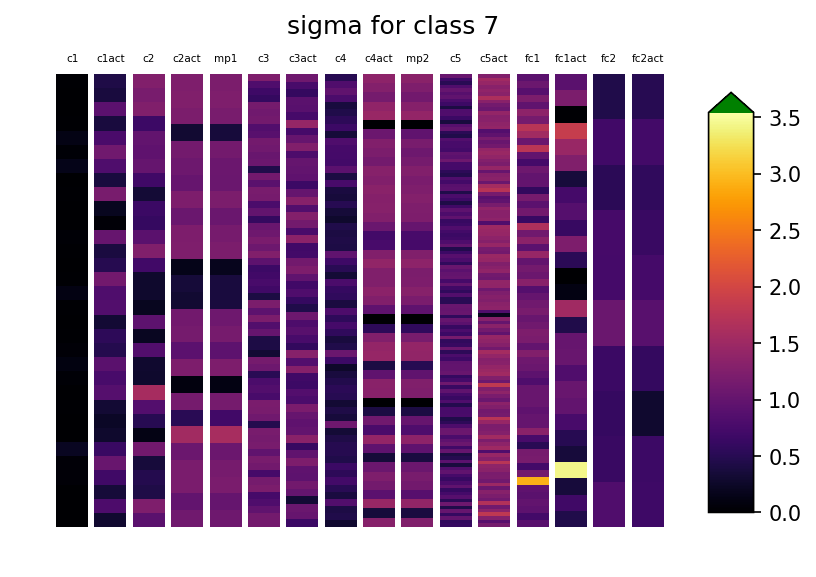

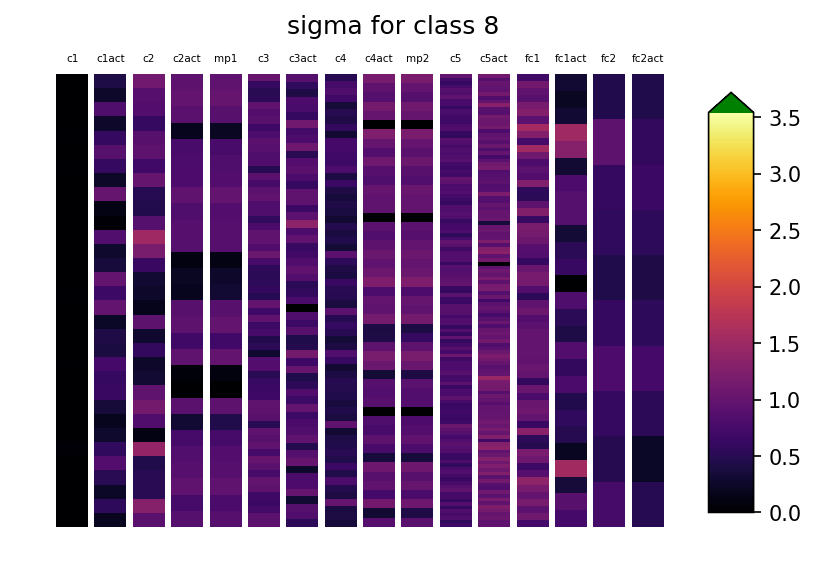

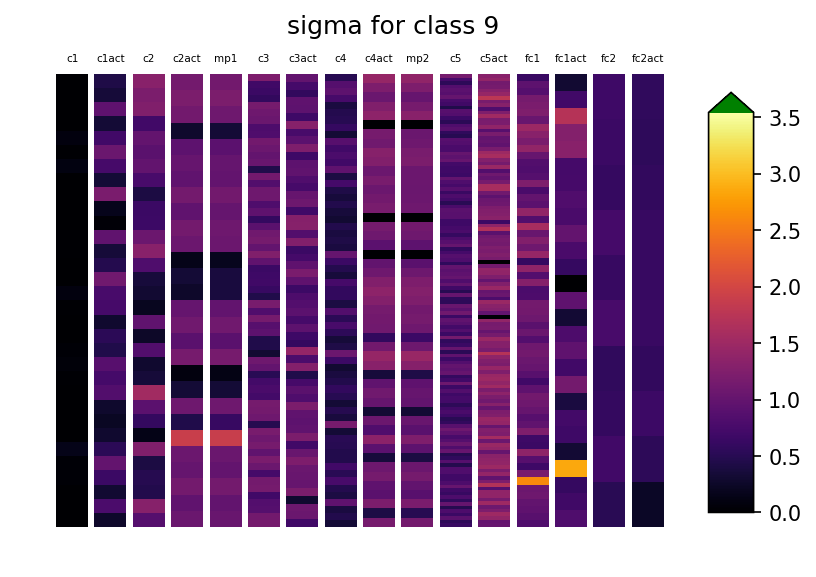

In [35]:


invariance.plot(rotated_invariance_measure,model,dataset.name,classes,savefig=True,savefig_suffix="rotated",vmax=vmax_class)



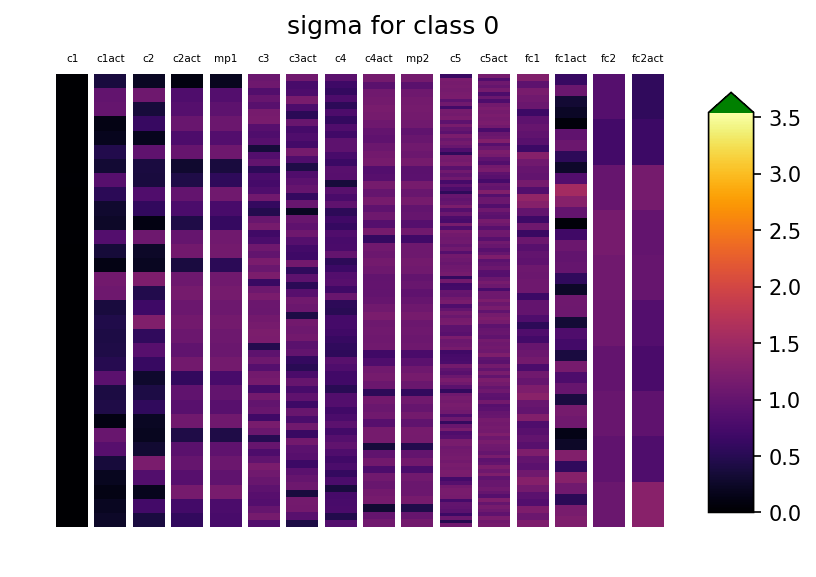

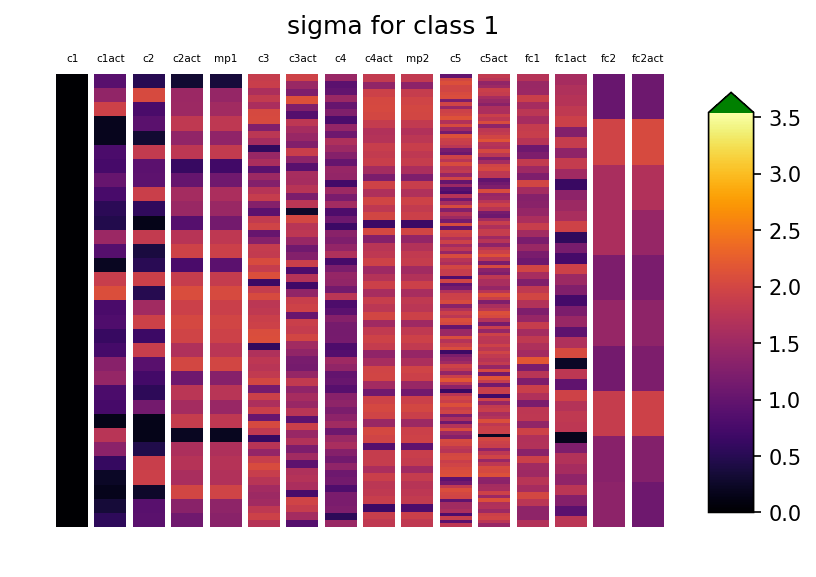

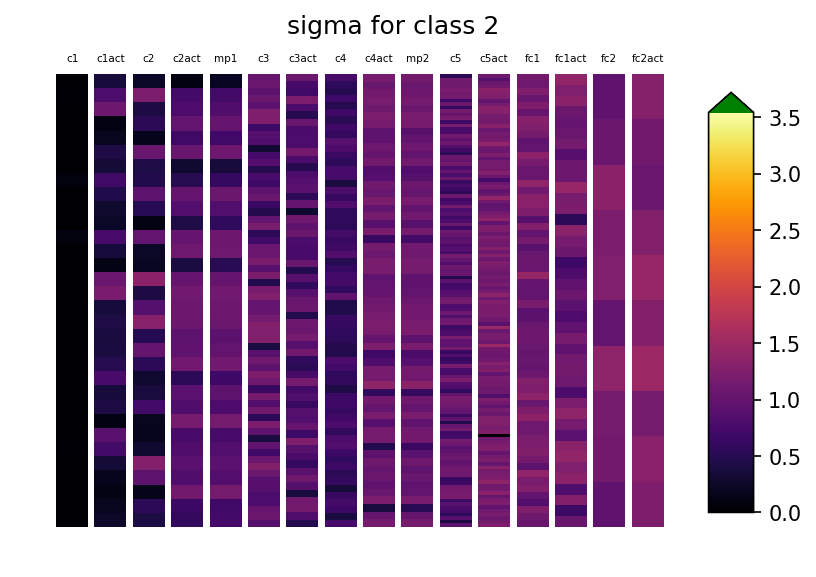

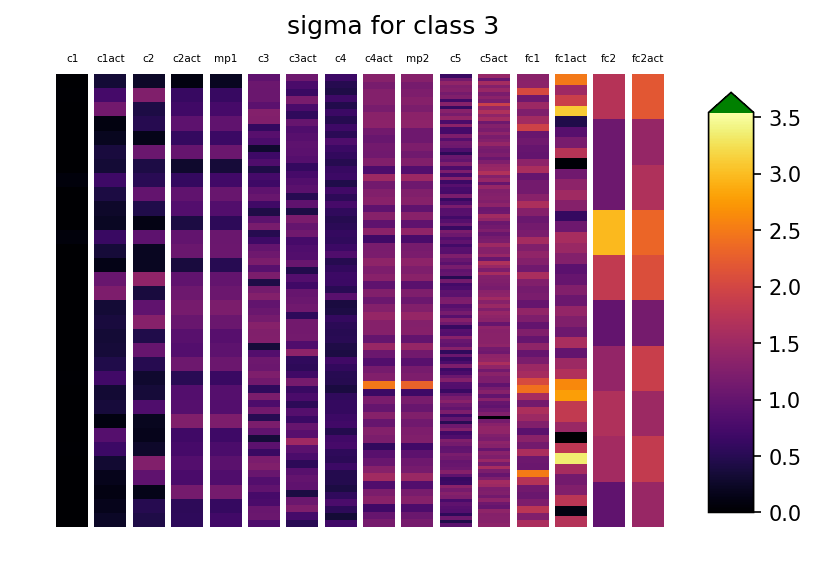

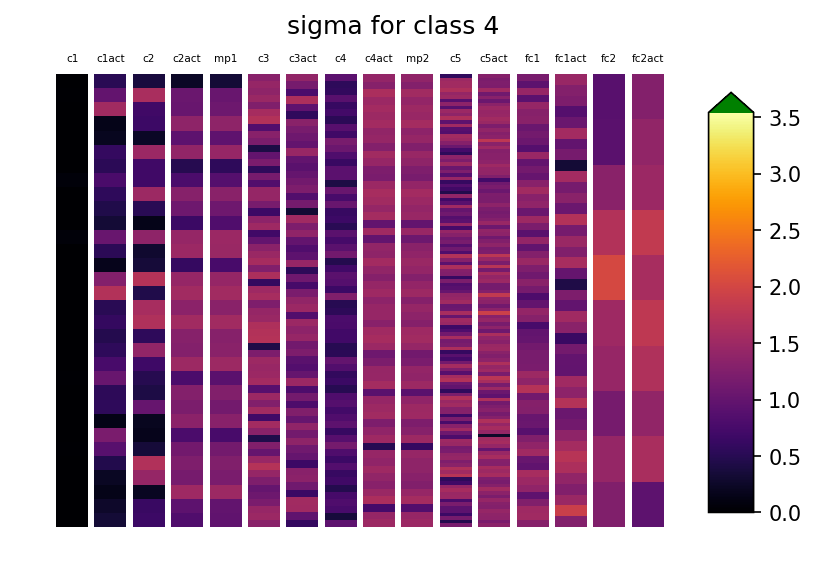

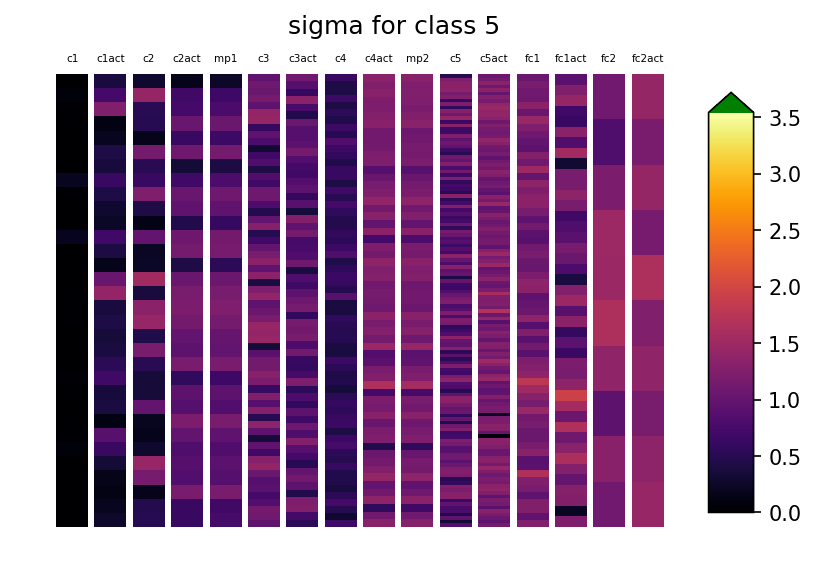

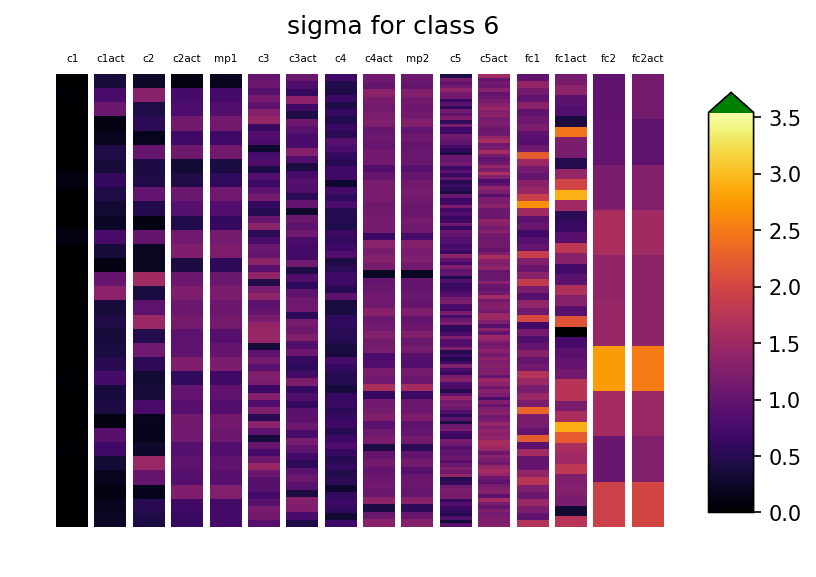

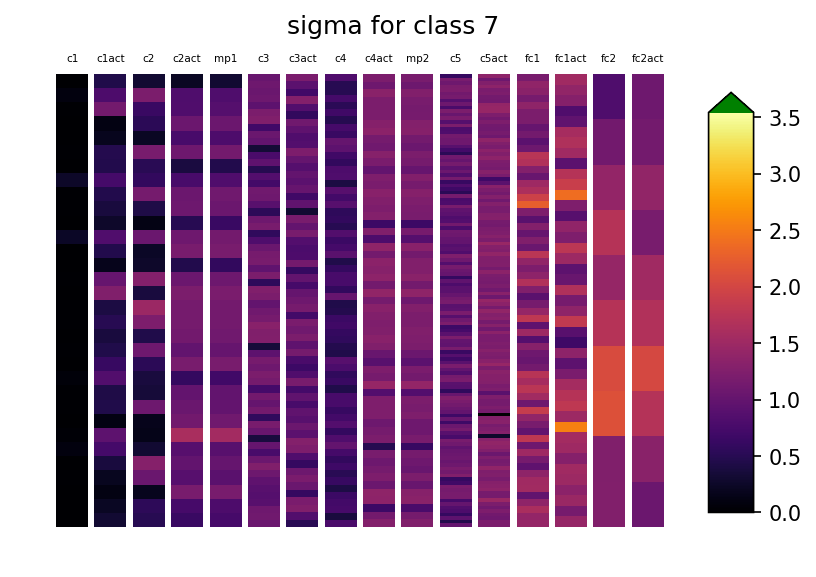

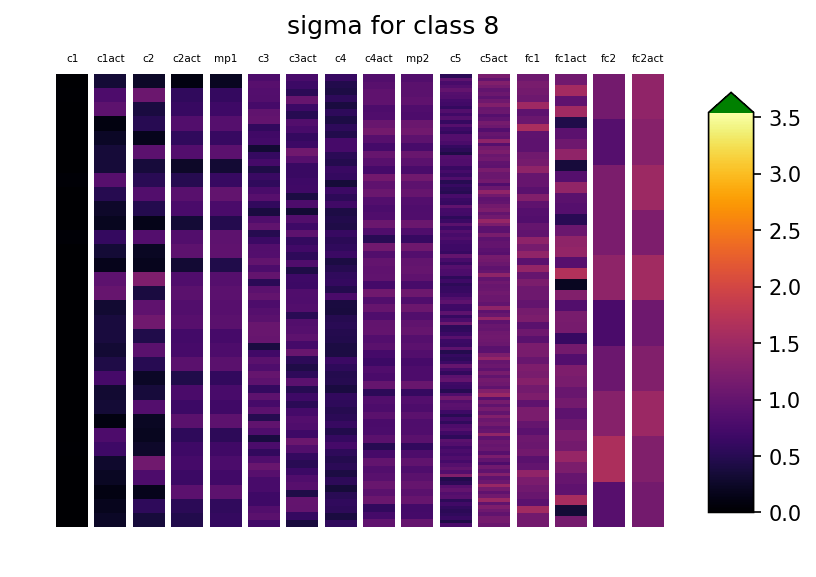

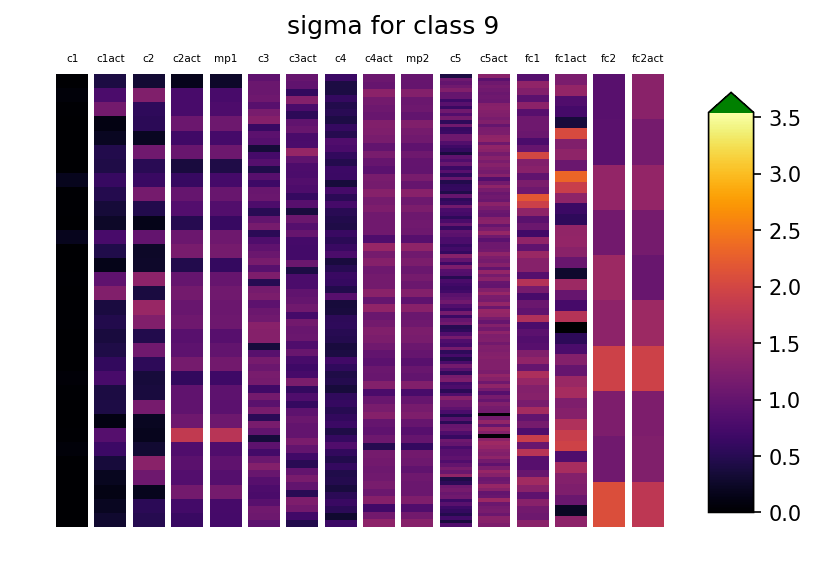

In [36]:

invariance.plot(invariance_measure,model,dataset.name,classes,savefig=True,savefig_suffix="unrotated",vmax=vmax_class)


In [37]:
rotated_invariance_measure_all_dataset,classes=invariance.run_all_dataset(rotated_model,dataset,config,rotations)
invariance_measure_all_dataset,classes=invariance.run_all_dataset(model,dataset,config,rotations)
vmin_all,vmax_all=invariance.outlier_range_both(rotated_invariance_measure,invariance_measure)
vmin_all=0


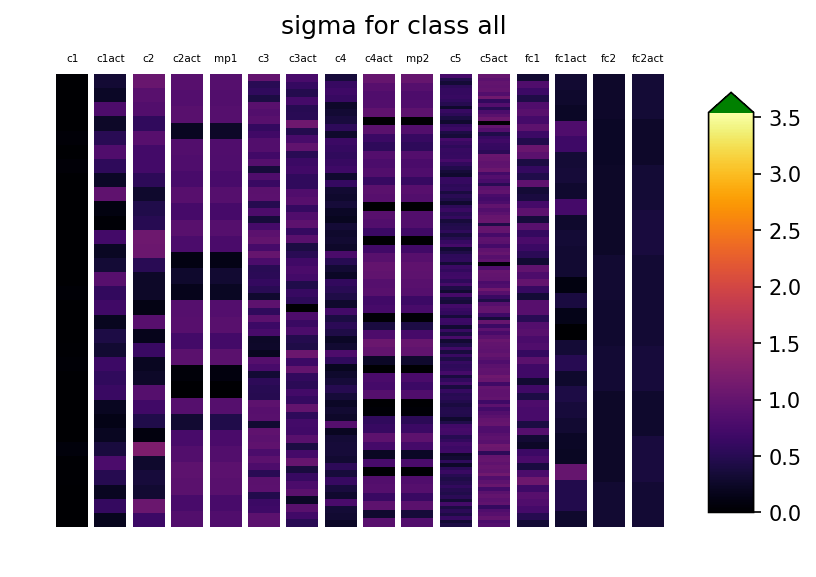

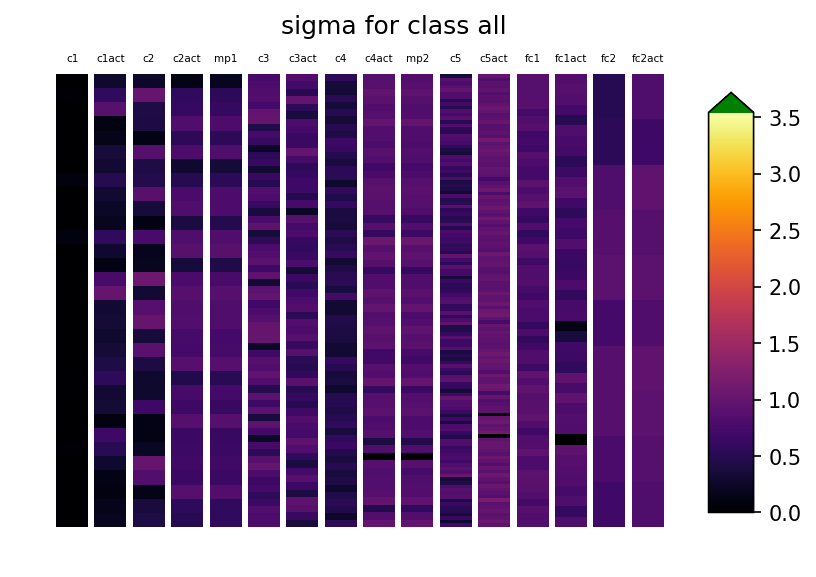

In [38]:
vmin_all,vmax_all=invariance.outlier_range_both(rotated_invariance_measure,invariance_measure)

invariance.plot(rotated_invariance_measure_all_dataset,rotated_model,dataset.name,classes,
                savefig=True,savefig_suffix="rotated",class_names=["all"],vmax=vmax_all)

invariance.plot(invariance_measure_all_dataset,model,dataset.name,classes,
                savefig=True,savefig_suffix="unrotated",class_names=["all"],vmax=vmax_all)